# Machine Learning for Penguin Species Classification

#### Research Paper Link:https://drive.google.com/file/d/1WgxoGqIwOTZGf3u9TrUQTQfmESs51WwS/view?usp=sharing

### Import Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read the dataset

DataSet URL:https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv

In [2]:
df=pd.read_csv('penguins.csv')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


### Data Cleaning

In [6]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [7]:
df.dropna(inplace=True)
df.shape

(333, 7)

#### Outlier Detection

<Axes: >

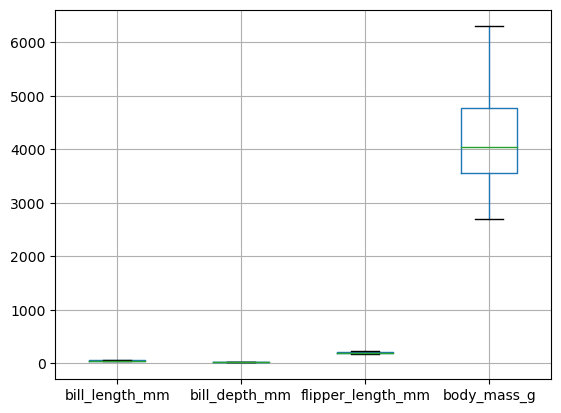

In [8]:
df.boxplot()

No Outliers present in the dataset

### Exploratory Data Analysis

#### which are the different species of penguins and what is the species wise number of penguins?

In [9]:
df['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

#### Visualizing gender-wise the number of penguins in each species

<Axes: xlabel='species', ylabel='count'>

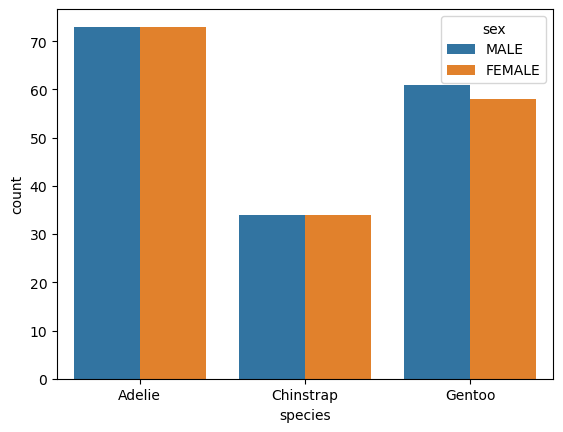

In [10]:
sns.countplot(x='species',data=df,hue='sex')

#### Which are the different islands and what is the number of penguins in those islands?

In [11]:
df['island'].value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

#### Visualizing the species-wise number of penguins on islands

<Axes: xlabel='island', ylabel='count'>

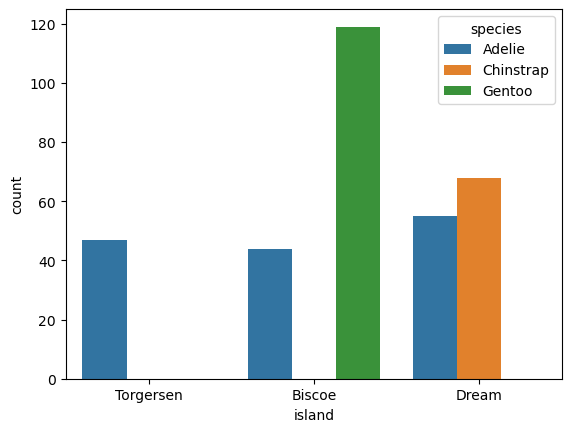

In [12]:
sns.countplot(x='island',data=df,hue='species')

#### Genderwise percentage of pengiuns

<Axes: title={'center': 'Genderwise percentage of pengiuns'}, ylabel='sex'>

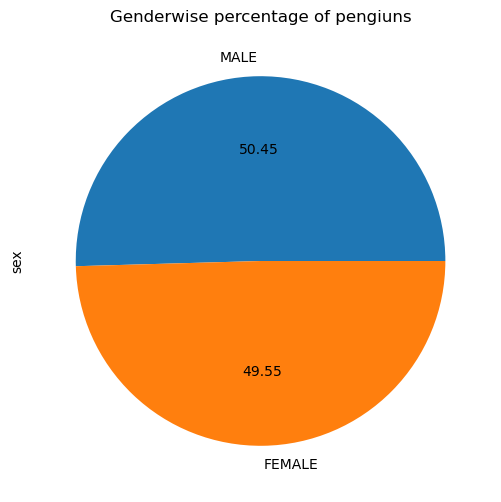

In [13]:
df['sex'].value_counts().plot(kind='pie',figsize=[10,6],title="Genderwise percentage of pengiuns",autopct="%.2f")

#### Visualizing Relationship between flipper_length_mm and body_mass_g w.r.t species

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

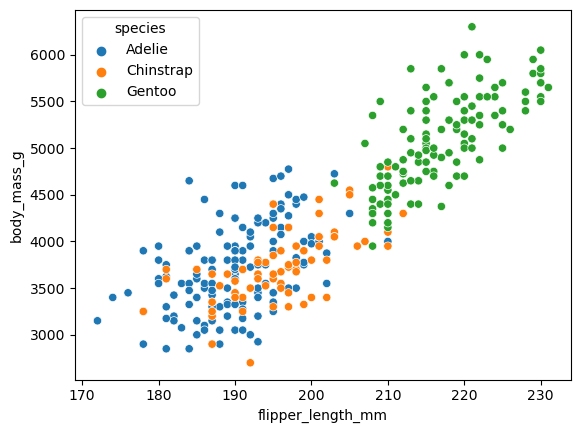

In [14]:
sns.scatterplot(x='flipper_length_mm',y='body_mass_g',data=df,hue='species')

#### Visualizing Relationship between bill_length_mm and body_mass_g w.r.t species

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

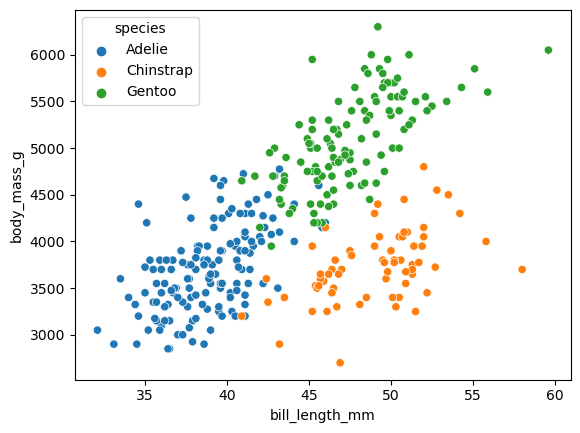

In [15]:
sns.scatterplot(x='bill_length_mm',y='body_mass_g',data=df,hue='species')

#### Visualizing Relationship between bill_depth_mm and body_mass_g w.r.t species

<Axes: xlabel='bill_depth_mm', ylabel='body_mass_g'>

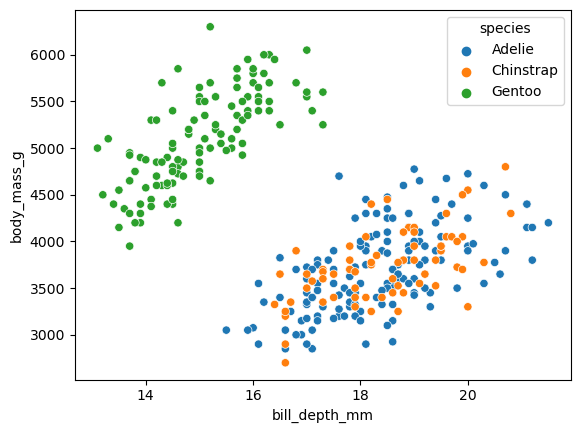

In [16]:
sns.scatterplot(x='bill_depth_mm',y='body_mass_g',data=df,hue='species')

#### Visualizing Relationship between bill_length_mm and bill_depth_mm w.r.t species

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

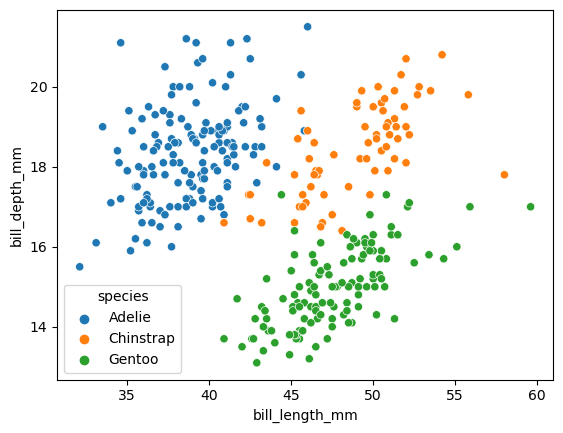

In [17]:
sns.scatterplot(x='bill_length_mm',y='bill_depth_mm',data=df,hue='species')

#### Visualizing Relationship between all the numerical features of Penguins w.r.t one another 

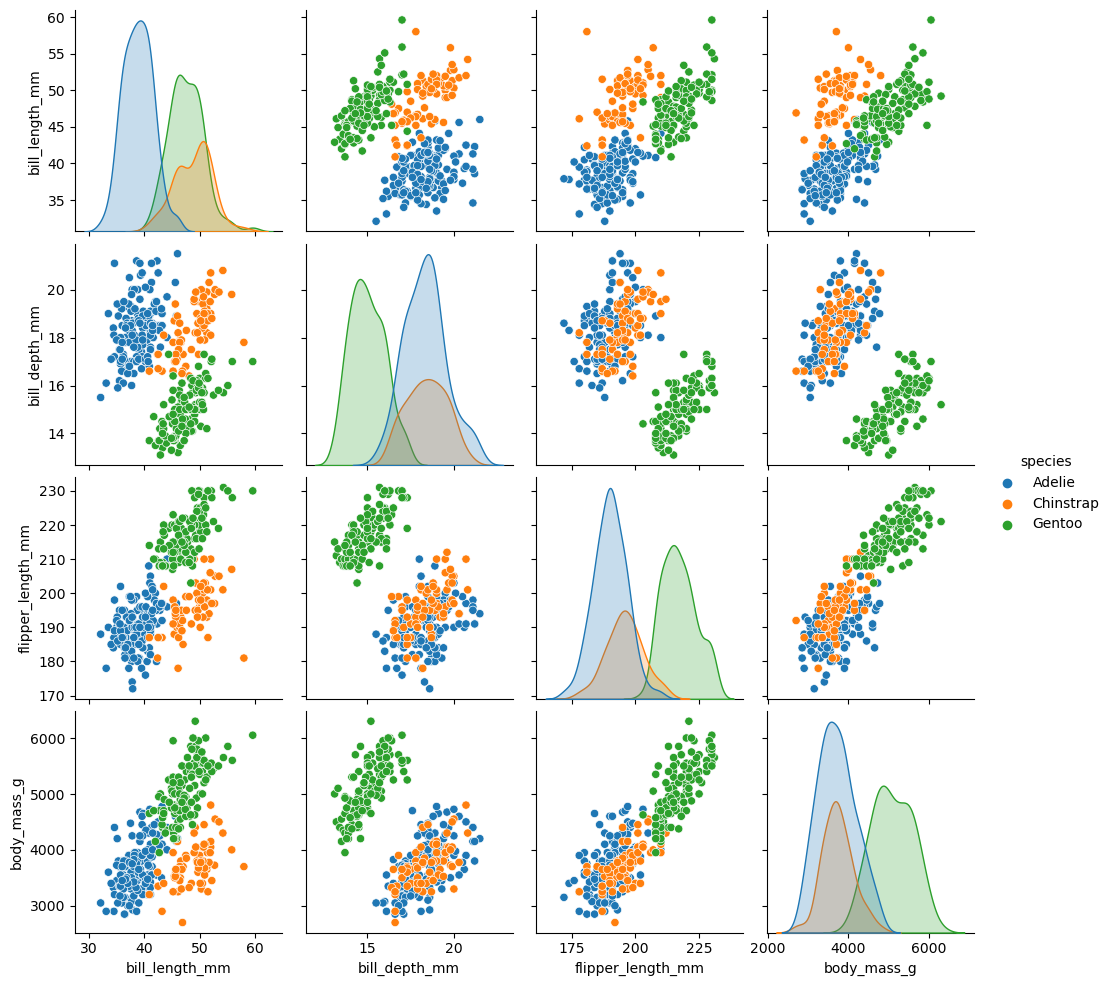

In [18]:
sns.pairplot(df,hue='species')

#### Species-wise statistics of penguins w.r.t their quntitative features

In [19]:
grp=df.groupby('species')

In [20]:
grp.describe().transpose()

species                       Adelie    Chinstrap       Gentoo
bill_length_mm    count   146.000000    68.000000   119.000000
                  mean     38.823973    48.833824    47.568067
                  std       2.662597     3.339256     3.106116
                  min      32.100000    40.900000    40.900000
                  25%      36.725000    46.350000    45.350000
                  50%      38.850000    49.550000    47.400000
                  75%      40.775000    51.075000    49.600000
                  max      46.000000    58.000000    59.600000
bill_depth_mm     count   146.000000    68.000000   119.000000
                  mean     18.347260    18.420588    14.996639
                  std       1.219338     1.135395     0.985998
                  min      15.500000    16.400000    13.100000
                  25%      17.500000    17.500000    14.200000
                  50%      18.400000    18.450000    15.000000
                  75%      19.000000    19.400000    15.750000
                  max      21.500000    20.800000    17.300000
flipper_length_mm count   146.000000    68.000000   119.000000
                  mean    190.102740   195.823529   217.235294
                  std       6.521825     7.131894     6.585431
                  min     172.000000   178.000000   203.000000
                  25%     186.000000   191.000000   212.000000
                  50%     190.000000   196.000000   216.000000
                  75%     195.000000   201.000000   221.500000
                  max     210.000000   212.000000   231.000000
body_mass_g       count   146.000000    68.000000   119.000000
                  mean   3706.164384  3733.088235  5092.436975
                  std     458.620135   384.335081   501.476154
                  min    2850.000000  2700.000000  3950.000000
                  25%    3362.500000  3487.500000  4700.000000
                  50%    3700.000000  3700.000000  5050.000000
                  75%    4000.000000  3950.000000  5500.000000
                  max    4775.000000  4800.000000  6300.000000

### Feature Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder
lblen=LabelEncoder()
df['sex']=lblen.fit_transform(df['sex'])
df['island']=lblen.fit_transform(df['island'])
df['species']=lblen.fit_transform(df['species'])

In [22]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...
338,2,0,47.2,13.7,214.0,4925.0,0
340,2,0,46.8,14.3,215.0,4850.0,0
341,2,0,50.4,15.7,222.0,5750.0,1
342,2,0,45.2,14.8,212.0,5200.0,0


### Separate input and output data

In [23]:
x=df.drop(['species'],axis=1)
y=df['species']

In [24]:
x.shape,y.shape

((333, 6), (333,))

### Feature Selection using filter method

Selecting the top 3 best features for helping us to Predict the species of Penguin

In [25]:
from sklearn.feature_selection import SelectKBest,chi2
skf=SelectKBest(k=3,score_func=chi2)
skf.fit(x,y)

SelectKBest(k=3, score_func=<function chi2 at 0x000001CE0BD47560>)

In [26]:
skf.get_feature_names_out()

array(['bill_length_mm', 'flipper_length_mm', 'body_mass_g'], dtype=object)

In [27]:
x_filt=x.iloc[:,skf.get_support()]
x_filt

,bill_length_mm,flipper_length_mm,body_mass_g
0,39.1,181.0,3750.0
1,39.5,186.0,3800.0
2,40.3,195.0,3250.0
4,36.7,193.0,3450.0
5,39.3,190.0,3650.0
...,...,...,...
338,47.2,214.0,4925.0
340,46.8,215.0,4850.0
341,50.4,222.0,5750.0
342,45.2,212.0,5200.0


### Feature Scaling

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x_filt)

In [29]:
x_scaled.shape

(333, 3)

### Separate train and test data

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=0)

In [31]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((249, 3), (84, 3), (249,), (84,))

### Prediction Model

### 1.KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train,y_train)

KNeighborsClassifier()

##### Performance metrics

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
from sklearn.metrics import accuracy_score,confusion_matrix

In [34]:
y_pred=clf.predict(x_test)

In [35]:
y_pred

array([0, 0, 2, 0, 0, 0, 1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0,
       2, 2, 1, 2, 2, 1, 2, 1, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2])

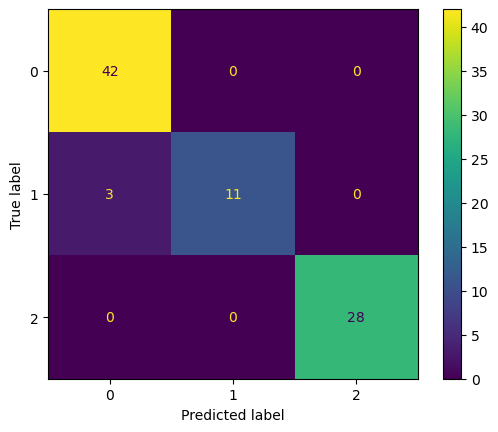

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [37]:
accuracy_score(y_test,y_pred)

0.9642857142857143

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        42
           1       1.00      0.79      0.88        14
           2       1.00      1.00      1.00        28

    accuracy                           0.96        84
   macro avg       0.98      0.93      0.95        84
weighted avg       0.97      0.96      0.96        84



### 2.Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

##### Decision tree visualization

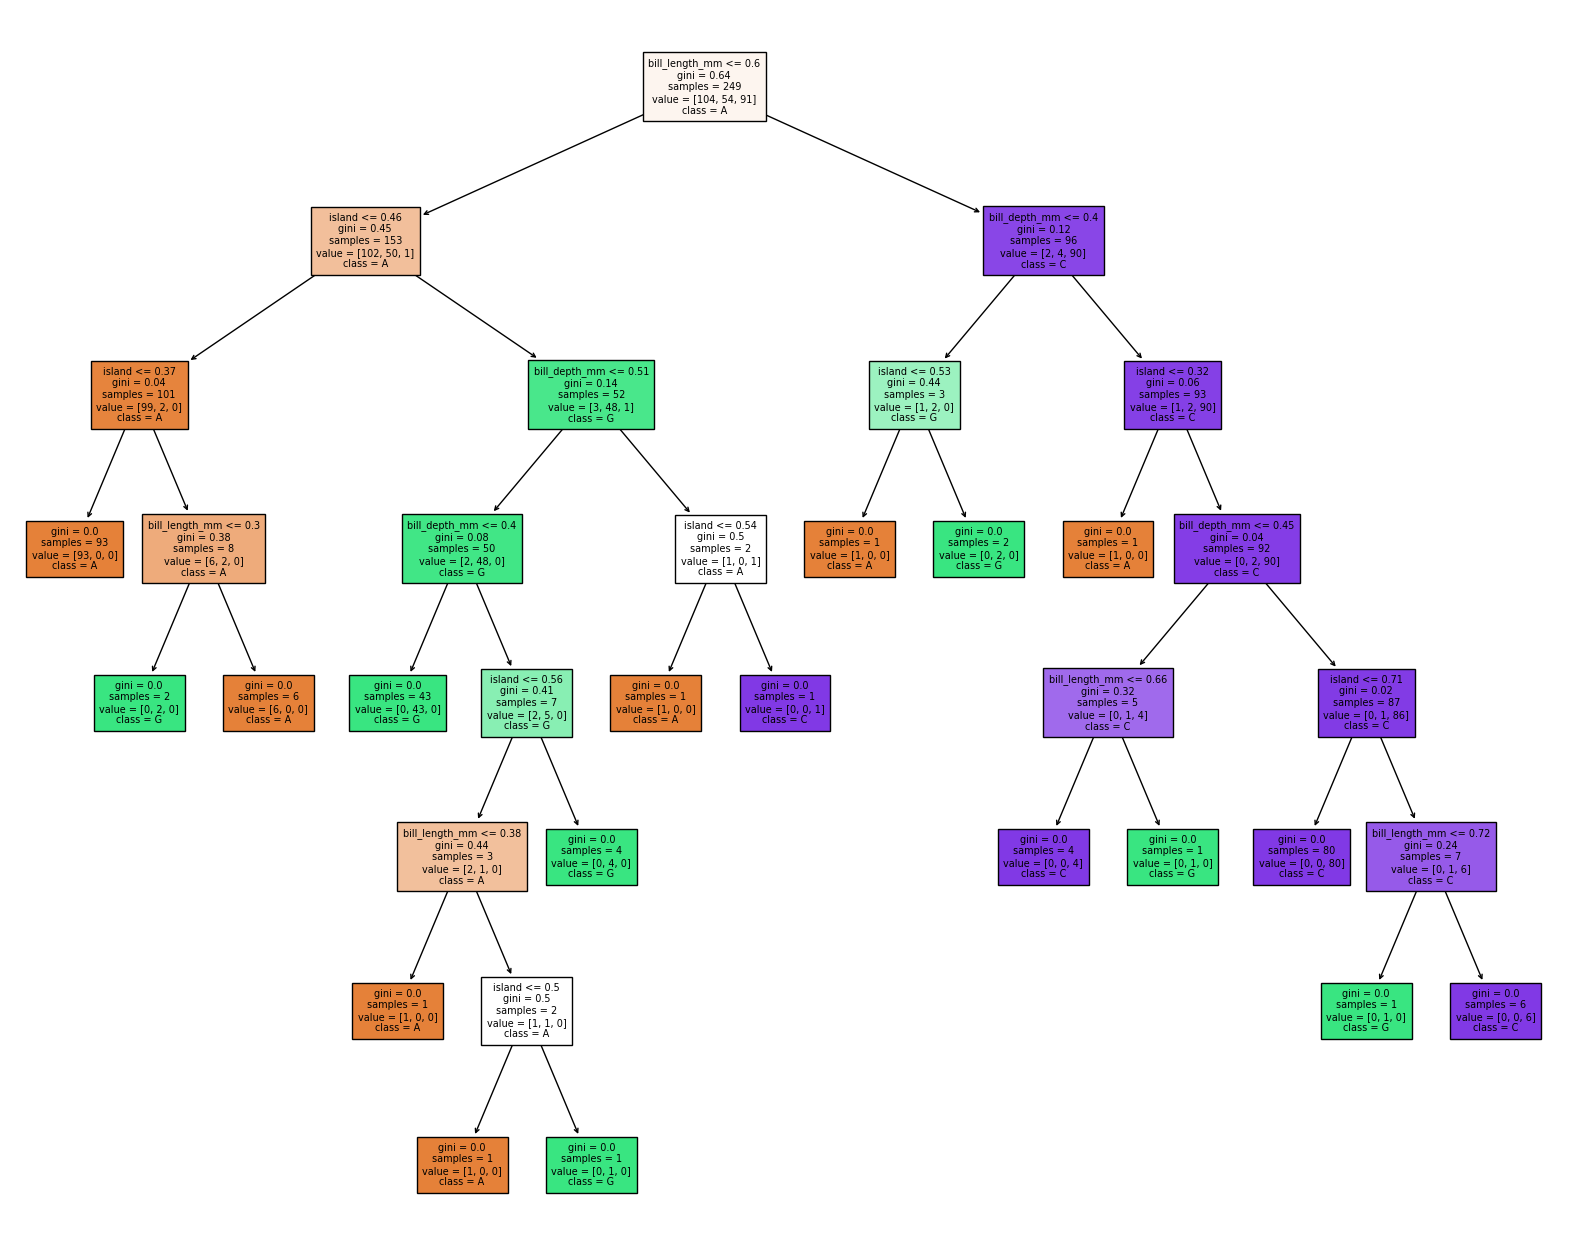

In [40]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,16))
plot_tree(classifier,fontsize=7,filled=True,class_names=['A','G','C'],feature_names=x.columns,precision=2);

#### Performance metrics

In [41]:
y_pred=classifier.predict(x_test)
y_pred

array([0, 0, 2, 0, 0, 0, 1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0,
       0, 2, 1, 2, 2, 1, 2, 1, 0, 2, 0, 2, 0, 2, 1, 0, 2, 2])

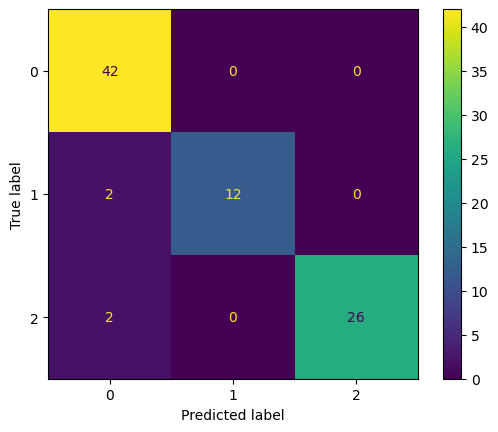

In [42]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

In [43]:
accuracy_score(y_test,y_pred)

0.9523809523809523

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        42
           1       1.00      0.86      0.92        14
           2       1.00      0.93      0.96        28

    accuracy                           0.95        84
   macro avg       0.97      0.93      0.95        84
weighted avg       0.96      0.95      0.95        84



### 3.Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
rclf=RandomForestClassifier(random_state=0)
rclf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

#### Performance metrics

In [46]:
y_pred=rclf.predict(x_test)
y_pred

array([0, 0, 2, 0, 0, 0, 1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0,
       2, 2, 1, 2, 2, 1, 2, 1, 0, 2, 0, 2, 0, 2, 1, 0, 2, 2])

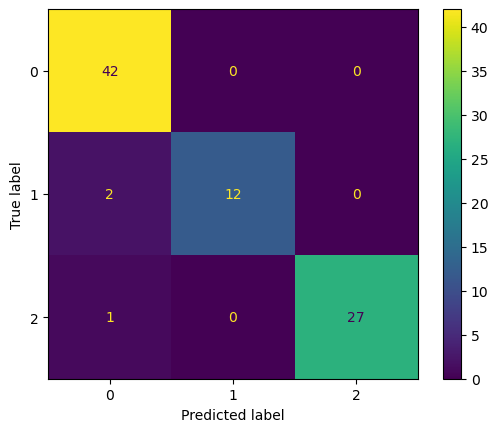

In [47]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [48]:
accuracy_score(y_test,y_pred)

0.9642857142857143

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        42
           1       1.00      0.86      0.92        14
           2       1.00      0.96      0.98        28

    accuracy                           0.96        84
   macro avg       0.98      0.94      0.96        84
weighted avg       0.97      0.96      0.96        84



#### Research Paper Link:https://drive.google.com/file/d/1WgxoGqIwOTZGf3u9TrUQTQfmESs51WwS/view?usp=sharing